## 라이브러리 불러오기

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString, shape
from shapely.geometry.polygon import Polygon
import requests
import numpy as np
import pyproj
import os
pd.options.display.float_format = '{:,.2f}'.format

## 광진구 지번 및 지번코드

In [2]:
map_GJ= gpd.GeoDataFrame.from_file('./LSMD_CONT_LDREG_서울_광진구/LSMD_CONT_LDREG_11215.shp', encoding='cp949')
map_GJ.head()

,sgg_oid,jibun,bchk,pnu,col_adm_se,geometry
0,201793,18-54 공,1,1121510200100180054,11215,"POLYGON ((207056.900 550304.134, 207056.161 55..."
1,83707,135-19도,1,1121510200101350019,11215,"POLYGON ((207250.092 550332.795, 207255.628 55..."
2,83772,135-35대,1,1121510200101350035,11215,"POLYGON ((207267.052 550312.245, 207272.349 55..."
3,83473,143대,1,1121510200101430000,11215,"POLYGON ((207122.576 550390.448, 207132.447 55..."
4,92539,553-59도,1,1121510500105530059,11215,"POLYGON ((205770.324 548585.328, 205772.210 54..."


In [3]:
print(map_GJ.crs)

None


In [4]:
#좌표계 변환 (GRS80 중부원점에서 위도 경도 좌표계로)
map_GJ.set_crs(epsg=5186, inplace=True)
map_GJ = map_GJ.to_crs(epsg=4326)
map_GJ = map_GJ.to_crs({'init':'epsg:4326'})

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
map_GJ

,sgg_oid,jibun,bchk,pnu,col_adm_se,geometry
0,201793,18-54 공,1,1121510200100180054,11215,"POLYGON ((127.07986 37.55223, 127.07985 37.552..."
1,83707,135-19도,1,1121510200101350019,11215,"POLYGON ((127.08205 37.55249, 127.08211 37.552..."
2,83772,135-35대,1,1121510200101350035,11215,"POLYGON ((127.08224 37.55230, 127.08230 37.552..."
3,83473,143대,1,1121510200101430000,11215,"POLYGON ((127.08061 37.55301, 127.08072 37.552..."
4,92539,553-59도,1,1121510500105530059,11215,"POLYGON ((127.06529 37.53675, 127.06531 37.536..."
...,...,...,...,...,...,...
32682,99225,57-96도,1,1121510500100570096,11215,"POLYGON ((127.06461 37.53449, 127.06473 37.534..."
32683,94139,720도,1,1121510500107200000,11215,"POLYGON ((127.08028 37.53377, 127.08049 37.533..."
32684,94140,721-1도,1,1121510500107210001,11215,"POLYGON ((127.08228 37.53377, 127.08225 37.533..."
32685,94141,721도,1,1121510500107210000,11215,"POLYGON ((127.08257 37.53377, 127.08260 37.533..."


## 광진구 행정동 영역 데이터

In [6]:
map_hjd= gpd.GeoDataFrame.from_file('./Z_SOP_BND_ADM_DONG_PG\Z_SOP_BND_ADM_DONG_PG.shp', encoding='cp949')
map_hjd.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20210630,1101053,사직동,1,"POLYGON ((197702.069 453187.311, 197703.481 45..."
1,20210630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20210630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20210630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20210630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.618 45..."


In [7]:
print(map_hjd.crs)

PROJCS["ITRF_2000_TM_Korea_Central_Belt",GEOGCS["ITRF2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",500000],UNIT["m",1],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","5181"]]


In [8]:
# 좌표계 변환 (과거 GRS80 중부원점에서 위도 경도 좌표계로)
map_hjd = map_hjd.to_crs({'init':'epsg:4326'})

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
map_hjd

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20210630,1101053,사직동,1,"POLYGON ((126.97399 37.57823, 126.97400 37.578..."
1,20210630,1101054,삼청동,2,"POLYGON ((126.97714 37.59768, 126.97730 37.597..."
2,20210630,1101055,부암동,3,"POLYGON ((126.96173 37.60714, 126.96182 37.607..."
3,20210630,1101056,평창동,4,"POLYGON ((126.97509 37.63118, 126.97488 37.630..."
4,20210630,1101057,무악동,5,"POLYGON ((126.95975 37.58001, 126.96006 37.579..."
...,...,...,...,...,...
3496,20210630,3902058,서홍동,3497,"POLYGON ((126.53017 33.31800, 126.53041 33.317..."
3497,20210630,3902059,대륜동,3498,"MULTIPOLYGON (((126.51498 33.21638, 126.51497 ..."
3498,20210630,3902060,대천동,3499,"MULTIPOLYGON (((126.50292 33.22523, 126.50290 ..."
3499,20210630,3902061,중문동,3500,"POLYGON ((126.46566 33.36000, 126.46684 33.359..."


In [10]:
# 광진구 행정동만 선택해서 추출
map_hjd_GJ = map_hjd[map_hjd['ADM_DR_CD'].str[0:5] == '11050']

In [11]:
map_hjd_GJ

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
65,20210630,1105053,화양동,66,"POLYGON ((127.07047 37.54799, 127.07057 37.547..."
66,20210630,1105054,군자동,67,"POLYGON ((127.07924 37.55673, 127.07911 37.556..."
67,20210630,1105055,중곡1동,68,"POLYGON ((127.07950 37.55717, 127.07950 37.557..."
68,20210630,1105056,중곡2동,69,"POLYGON ((127.08574 37.56338, 127.08574 37.563..."
69,20210630,1105057,중곡3동,70,"POLYGON ((127.08062 37.57164, 127.08065 37.571..."
70,20210630,1105058,중곡4동,71,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
71,20210630,1105059,능동,72,"POLYGON ((127.08274 37.55590, 127.08284 37.555..."
72,20210630,1105060,구의1동,73,"POLYGON ((127.09021 37.54283, 127.09014 37.542..."
73,20210630,1105061,구의2동,74,"POLYGON ((127.10492 37.55638, 127.10491 37.556..."
74,20210630,1105062,구의3동,75,"POLYGON ((127.09248 37.54412, 127.09266 37.544..."


In [12]:
using_columns = ['ADM_DR_CD', 'ADM_DR_NM', 'geometry']

In [13]:
# 필요한 열만 선택
map_hjd_GJ = map_hjd_GJ[using_columns]
map_hjd_GJ

,ADM_DR_CD,ADM_DR_NM,geometry
65,1105053,화양동,"POLYGON ((127.07047 37.54799, 127.07057 37.547..."
66,1105054,군자동,"POLYGON ((127.07924 37.55673, 127.07911 37.556..."
67,1105055,중곡1동,"POLYGON ((127.07950 37.55717, 127.07950 37.557..."
68,1105056,중곡2동,"POLYGON ((127.08574 37.56338, 127.08574 37.563..."
69,1105057,중곡3동,"POLYGON ((127.08062 37.57164, 127.08065 37.571..."
70,1105058,중곡4동,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
71,1105059,능동,"POLYGON ((127.08274 37.55590, 127.08284 37.555..."
72,1105060,구의1동,"POLYGON ((127.09021 37.54283, 127.09014 37.542..."
73,1105061,구의2동,"POLYGON ((127.10492 37.55638, 127.10491 37.556..."
74,1105062,구의3동,"POLYGON ((127.09248 37.54412, 127.09266 37.544..."


c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.

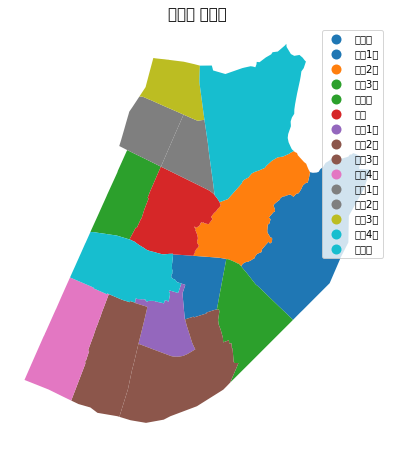

In [14]:
# 행정동 시각화
plt.figure(figsize=(15,15))
ax = plt.subplot(1, 2, 2)
map_hjd_GJ.dissolve(by='ADM_DR_NM').reset_index().plot(column = 'ADM_DR_NM', ax=ax, legend=True)
ax.set_title("광진구 행정동", fontsize=15)
ax.set_axis_off()

## 광진구 버스정류장 데이터

In [15]:
busS_SEOUL= pd.read_csv("./서울시 정류장마스터 정보.csv" ,encoding='cp949', dtype=str)
busS_SEOUL.head()

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부
0,717104358,계수사거리(경유),가상정류장,0,126.8174730000,37.4524730000,미설치
1,500000288,행사장입구,마을버스,25965,126.6915560000,37.3217420000,미설치
2,500000287,행사장입구,마을버스,25095,126.6917280000,37.3219420000,미설치
3,500000286,아남중전기,일반차로,25963,126.7104850000,37.3199340000,미설치
4,500000285,3Z,일반차로,25964,126.7071300000,37.3205660000,미설치


In [16]:
# 데이터를 맵핑하기 위하여 GeoDataFrame 형식으로 변환
busS_SEOUL['경도'] =busS_SEOUL['경도'].astype(float)
busS_SEOUL['위도'] = busS_SEOUL['위도'].astype(float)
busS_SEOUL['geometry'] = busS_SEOUL.apply(lambda row : Point([row['위도'], row['경도']]), axis=1)
busS_SEOUL = gpd.GeoDataFrame(busS_SEOUL, geometry='geometry')

busS_SEOUL.head()

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부,geometry
0,717104358,계수사거리(경유),가상정류장,0,126.82,37.45,미설치,POINT (126.81747 37.45247)
1,500000288,행사장입구,마을버스,25965,126.69,37.32,미설치,POINT (126.69156 37.32174)
2,500000287,행사장입구,마을버스,25095,126.69,37.32,미설치,POINT (126.69173 37.32194)
3,500000286,아남중전기,일반차로,25963,126.71,37.32,미설치,POINT (126.71049 37.31993)
4,500000285,3Z,일반차로,25964,126.71,37.32,미설치,POINT (126.70713 37.32057)


In [17]:
print(busS_SEOUL.crs)

None


In [18]:
# 좌표계 설정 및 광진구 버스 정류장만을 대상으로 하는 데이터 busS_GJ 생성
busS_SEOUL.crs = {'init':'epsg:4326'}
busS_SEOUL = busS_SEOUL.to_crs({'init':'epsg:4326'})
busS_GJ = gpd.sjoin(busS_SEOUL.to_crs(epsg=4326), map_GJ)
print(busS_GJ.crs)

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


EPSG:4326


C:\Users\jinsung\AppData\Local\Temp/ipykernel_19176/806253221.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  busS_GJ = gpd.sjoin(busS_SEOUL.to_crs(epsg=4326), map_GJ)


In [19]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,버스도착정보안내기_설치_여부,geometry,index_right,sgg_oid,jibun,bchk,pnu,col_adm_se
1759,277103552,뚝섬(경유),가상정류장,0,127.07,37.53,미설치,POINT (127.06709 37.53173),683,99593,73-3제,1,1121510500100730003,11215
1760,277103551,뚝섬(경유),가상정류장,0,127.07,37.53,미설치,POINT (127.06676 37.53182),639,99586,71-2제,1,1121510500100710002,11215
1800,277103511,영동대교북단(경유),가상정류장,0,127.06,37.53,미설치,POINT (127.05968 37.53371),613,99422,159-65제,1,1121510500101590065,11215
1801,277103510,잠실대교북단(경유),가상정류장,0,127.09,37.53,미설치,POINT (127.08828 37.52806),15,97065,704-7제,1,1121510500107040007,11215
1802,277103509,잠실대교북단(경유),가상정류장,0,127.09,37.53,미설치,POINT (127.08855 37.52881),6160,96951,753-3도,1,1121510500107530003,11215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69304,104000010,메리놀외방선교회,일반차로,05103,127.08,37.56,설치,POINT (127.07754 37.55921),4334,79283,669도,1,1121510100106690000,11215
69305,104000009,군자교,일반차로,05102,127.08,37.56,설치,POINT (127.07523 37.56239),25871,76788,610-3대,1,1121510100106100003,11215
69306,104000008,군자교,일반차로,05101,127.08,37.56,설치,POINT (127.07520 37.56153),25898,77282,614-1대,1,1121510100106140001,11215
69310,104000004,군자역.용마초등학교,중앙차로,05004,127.08,37.56,설치,POINT (127.08157 37.55622),28486,82493,265-10도,1,1121510200102650010,11215


In [20]:
# 필요한 열만 선택
using_columns = ['정류장_ID', '정류장_명칭', '정류장_유형', '정류장_번호', '위도','경도','geometry','sgg_oid','jibun','pnu']
busS_GJ = busS_GJ[using_columns]

In [21]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu
1759,277103552,뚝섬(경유),가상정류장,0,127.07,37.53,POINT (127.06709 37.53173),99593,73-3제,1121510500100730003
1760,277103551,뚝섬(경유),가상정류장,0,127.07,37.53,POINT (127.06676 37.53182),99586,71-2제,1121510500100710002
1800,277103511,영동대교북단(경유),가상정류장,0,127.06,37.53,POINT (127.05968 37.53371),99422,159-65제,1121510500101590065
1801,277103510,잠실대교북단(경유),가상정류장,0,127.09,37.53,POINT (127.08828 37.52806),97065,704-7제,1121510500107040007
1802,277103509,잠실대교북단(경유),가상정류장,0,127.09,37.53,POINT (127.08855 37.52881),96951,753-3도,1121510500107530003
...,...,...,...,...,...,...,...,...,...,...
69304,104000010,메리놀외방선교회,일반차로,05103,127.08,37.56,POINT (127.07754 37.55921),79283,669도,1121510100106690000
69305,104000009,군자교,일반차로,05102,127.08,37.56,POINT (127.07523 37.56239),76788,610-3대,1121510100106100003
69306,104000008,군자교,일반차로,05101,127.08,37.56,POINT (127.07520 37.56153),77282,614-1대,1121510100106140001
69310,104000004,군자역.용마초등학교,중앙차로,05004,127.08,37.56,POINT (127.08157 37.55622),82493,265-10도,1121510200102650010


In [22]:
# 가상정류장 제거 및 자료형 변환
busS_GJ = busS_GJ[busS_GJ['정류장_번호'] != '0']
busS_GJ['정류장_ID']=busS_GJ['정류장_ID'].astype(int)
busS_GJ['정류장_번호']=busS_GJ['정류장_번호'].astype(int)
busS_GJ 

c:\users\jinsung\appdata\local\programs\python\python39\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu
5018,274000018,잠실대교북단(경유),일반차로,78449,127.09,37.53,POINT (127.08857 37.52882),96951,753-3도,1121510500107530003
4549,274116390,천호대교북단(경유),일반차로,78253,127.11,37.54,POINT (127.10795 37.54426),91230,555-4천,1121510400105550004
2940,277102303,광나루역(경유),일반차로,78355,127.10,37.54,POINT (127.10425 37.54469),91245,218-22대,1121510400102180022
2942,277102301,잠실대교북단(경유),일반차로,78353,127.09,37.53,POINT (127.09049 37.52931),96289,701제,1121510500107010000
5017,274000019,잠실대교북단(경유),일반차로,78450,127.09,37.53,POINT (127.09048 37.52935),96289,701제,1121510500107010000
...,...,...,...,...,...,...,...,...,...,...
69304,104000010,메리놀외방선교회,일반차로,5103,127.08,37.56,POINT (127.07754 37.55921),79283,669도,1121510100106690000
69305,104000009,군자교,일반차로,5102,127.08,37.56,POINT (127.07523 37.56239),76788,610-3대,1121510100106100003
69306,104000008,군자교,일반차로,5101,127.08,37.56,POINT (127.07520 37.56153),77282,614-1대,1121510100106140001
69310,104000004,군자역.용마초등학교,중앙차로,5004,127.08,37.56,POINT (127.08157 37.55622),82493,265-10도,1121510200102650010


In [23]:
# 버스정류장이 속한 행정동 추가
busS_GJ = gpd.sjoin(busS_GJ.to_crs(epsg=4326), map_hjd_GJ)

C:\Users\jinsung\AppData\Local\Temp/ipykernel_19176/59806684.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  busS_GJ = gpd.sjoin(busS_GJ.to_crs(epsg=4326), map_hjd_GJ)


In [24]:
busS_GJ

,정류장_ID,정류장_명칭,정류장_유형,정류장_번호,위도,경도,geometry,sgg_oid,jibun,pnu,index_right,ADM_DR_CD,ADM_DR_NM
5018,274000018,잠실대교북단(경유),일반차로,78449,127.09,37.53,POINT (127.08857 37.52882),96951,753-3도,1121510500107530003,77,1105065,자양2동
2942,277102301,잠실대교북단(경유),일반차로,78353,127.09,37.53,POINT (127.09049 37.52931),96289,701제,1121510500107010000,77,1105065,자양2동
5017,274000019,잠실대교북단(경유),일반차로,78450,127.09,37.53,POINT (127.09048 37.52935),96289,701제,1121510500107010000,77,1105065,자양2동
69003,104900116,행운슈퍼앞,마을버스,5572,127.09,37.53,POINT (127.08701 37.53295),94599,682-15대,1121510500106820015,77,1105065,자양2동
69005,104900114,성자초등학교앞,마을버스,5562,127.08,37.53,POINT (127.08226 37.53130),95777,652-31대,1121510500106520031,77,1105065,자양2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69205,104000127,영동대교북단,일반차로,5220,127.06,37.54,POINT (127.06116 37.53657),98481,235-3전,1121510500102350003,79,1105067,자양4동
69207,104000125,건대로데오거리입구,일반차로,5218,127.07,37.54,POINT (127.06993 37.53892),247655,2-65 도,1121510500100020065,79,1105067,자양4동
69208,104000124,건대입구역6번출구,일반차로,5217,127.07,37.54,POINT (127.06728 37.54083),97155,8-24대,1121510500100080024,79,1105067,자양4동
69209,104000123,노룬산시장,일반차로,5216,127.06,37.54,POINT (127.06269 37.53950),97503,250-10대,1121510500102500010,79,1105067,자양4동


In [25]:
busS_GJ.to_csv('busstop_GJ.csv')

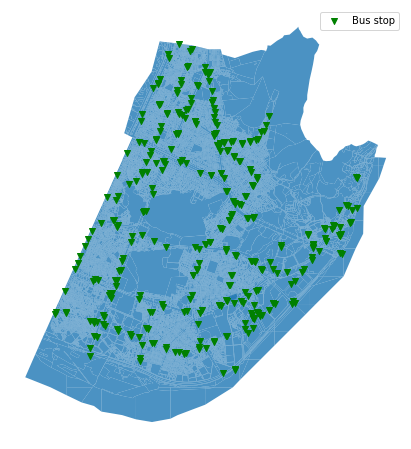

In [78]:
# 버스정류장 행정동 별로 시각화
ax = map_GJ.plot(figsize=(8,8), alpha=0.8)
busS_GJ.plot(ax=ax,marker='v', label='Bus stop', c = 'g')
ax.set_axis_off()
plt.legend()
plt.show()

## 광진구 버스 노선별 승하차 인원 데이터

In [27]:
# 서울버스가 아닌 광역버스 데이터의 경우 포함되어있지 않음
file_list = [filename for filename in os.listdir('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보')]
bus_SEOUL = pd.DataFrame()
for file in file_list:
    temp_df = pd.read_csv('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보/'+file, encoding='cp949')
    bus_SEOUL = pd.concat([bus_SEOUL,temp_df])

C:\Users\jinsung\AppData\Local\Temp/ipykernel_19176/3004265843.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보/'+file, encoding='cp949')
C:\Users\jinsung\AppData\Local\Temp/ipykernel_19176/3004265843.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보/'+file, encoding='cp949')
C:\Users\jinsung\AppData\Local\Temp/ipykernel_19176/3004265843.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보/'+file, encoding='cp949')
C:\Users\jinsung\AppData\Local\Temp/ipykernel_19176/3004265843.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv('./2022년_버스노선별_정류장별_시간대별_승하차_인원_정보/'+file, en

In [28]:
bus_SEOUL

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,교통수단타입코드,교통수단타입명
0,202201,741,741번(진관차고지~헌인릉입구),100000001,1001,종로2가사거리,27,69,14,40,...,175,284,153,230,105,77,51,20220203,NaN,NaN
1,202201,N37,N37번(진관공영차고지~송파공영차고지),100000001,1001,종로2가사거리,0,0,0,0,...,0,0,0,0,0,0,0,20220203,NaN,NaN
2,202201,470,470번(상암차고지~안골마을),100000001,1001,종로2가사거리,10,49,0,0,...,201,358,253,137,107,72,64,20220203,NaN,NaN
3,202201,N37,N37번(송파공영차고지~진관공영차고지),100000001,1001,종로2가사거리,0,5,31,89,...,0,0,0,0,0,0,0,20220203,NaN,NaN
4,202201,100,100번(하계동~용산구청),100000002,1002,창경궁.서울대학교병원,0,0,0,0,...,18,42,44,28,14,14,1,20220203,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41758,202212,9404,9404번(분당구미~신사역),999800004,~,구미동차고지(종점가상)(00062),0,12,0,22,...,6,0,5,0,13,0,4,20230103,50.00,서울광역버스
41759,202212,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00079),0,1,0,2,...,1,0,1,0,3,0,0,20230103,50.00,서울광역버스
41760,202212,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00078),0,0,0,3,...,0,0,0,0,0,0,1,20230103,50.00,서울광역버스
41761,202212,9707,9707번(고양 가좌동~영등포역),999800005,~,가좌동종점(종점가상)(00076),0,4,0,1,...,1,0,0,0,0,0,3,20230103,50.00,서울광역버스


In [29]:
# 광진구 버스정류장 번호 배열 생성
array_ars = busS_GJ.loc[:,'정류장_번호']
array_ars.values

array([78449, 78353, 78450,  5572,  5562,  5551,  5588,  5576,  5580,
        5589,  5192,  5199,  5194,  5193,  5191,  5190,  5189, 78253,
       78355, 78252, 78452, 78451,  5671,  5990,  5992,  5993,  5670,
        5738,  5265,  5584,  5519,  5732,  5728,  5740,  5298,  5742,
        5509,  5514,  5744,  5504,  5528,  5533,  5578,  5581,  5587,
        5591,  5595,  5597,  5600,  5673,  5165,  5299,  5172,  5298,
        5011,  5171,  5012,  5753,  5745,  5174,  5173,  5170,  5169,
        5166,  5168,  5167, 78080,  5612, 78074, 78424, 78400,  5757,
        5999,  5547,  5543,  5162,  5267,  5538,  5163,  5585,  5555,
        5570,  5164,  5550,  5579,  5582,  5266, 78645,  5161,  5721,
        5724,  5560,  5565,  5273,  5272, 78647, 78646,  5158,  5157,
        5156,  5994,  5991,  5003,  5532,  5260,  5746,  5546,  5750,
        5118,  5751,  5119,  5512,  5537,  5005,  5540,  5542,  5554,
        5114,  5117,  5116,  5115,  5113,  5511,  5755,  5502,  5134,
        5131,  5507,

In [30]:
# 광진구 버스정류장 ID 배열 생성
array_busSid = busS_GJ.loc[:,'정류장_ID']
array_busSid.values

array([274000018, 277102301, 274000019, 104900116, 104900114, 104900112,
       104900107, 104900106, 104900019, 104900016, 104000291, 104000106,
       104000101, 104000100, 104000098, 104000097, 104000096, 274116390,
       277102303, 274116389, 274000021, 274000020, 104900127, 104900126,
       104900119, 104900118, 104900010, 104900111, 104000269, 104900110,
       104900109, 104900108, 104900073, 104900066, 104000307, 104900064,
       104900057, 104900054, 104900063, 104900058, 104900050, 104900046,
       104900020, 104900018, 104900017, 104900015, 104900013, 104900012,
       104900011, 104900008, 104000072, 104000306, 104000271, 104000305,
       104000298, 104000078, 104000297, 104000282, 104000281, 104000081,
       104000080, 104000077, 104000076, 104000073, 104000075, 104000074,
       277101942, 104000277, 277101909, 277101720, 277101638, 104900133,
       104900129, 104900104, 104900038, 104000279, 104000069, 104900105,
       104000070, 104900103, 104900102, 104900101, 

In [31]:
# 위 두 배열에 해당하는 버스정류장을 지나가는 데이터 bus_GJ 생성
bus_GJ = bus_SEOUL[bus_SEOUL['버스정류장ARS번호'].isin(array_ars)]
bus_GJ = bus_SEOUL[bus_SEOUL['표준버스정류장ID'].isin(array_busSid)]

In [32]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,교통수단타입코드,교통수단타입명
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,56,84,0,0,...,248,393,342,176,163,150,146,20220203,NaN,NaN
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,171,200,178,118,120,36,31,20220203,NaN,NaN
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,15,23,7,10,4,0,0,20220203,NaN,NaN
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,57,303,68,93,29,0,0,20220203,NaN,NaN
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,112,109,0,0,...,219,752,369,338,229,195,150,20220203,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,202212,강동01,강동01(명일동한양아파트~강변역),104900129,5999,강변역.테크노마트앞(00031),0,0,0,0,...,616,1836,393,1726,339,624,153,20230103,30.00,서울마을버스
5685,202212,광진02,광진02(긴고랑~군자역),104900132,5994,용마사거리.중곡동우체국(00014),0,0,0,0,...,35,7,21,1,8,0,0,20230103,30.00,서울마을버스
5686,202212,광진04,광진04(중곡아파트~강변역),104900133,5757,구의3동주민센터(00023),0,0,0,0,...,2,1,0,1,0,0,0,20230103,30.00,서울마을버스
5687,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900133,5757,구의3동주민센터(00011),0,0,0,0,...,12,4,3,1,4,0,4,20230103,30.00,서울마을버스


In [33]:
# 필요한 열만 선택
bus_GJ = bus_GJ.drop(["등록일자","교통수단타입코드","교통수단타입명"], axis=1)

In [34]:
bus_GJ.iloc[:,6:7]

,00시승차총승객수
2328,56
2329,0
2330,0
2331,0
4429,112
...,...
5682,0
5685,0
5686,0
5687,0


In [35]:
for i in range(24):
    name = str(i)
    bus_GJ[name] = bus_GJ.iloc[:,6 + 2 * i] + bus_GJ.iloc[:,7 + 2 * i]

In [36]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,56,84,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,112,109,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,202212,강동01,강동01(명일동한양아파트~강변역),104900129,5999,강변역.테크노마트앞(00031),0,0,0,0,...,2591,2842,3410,4264,5620,3747,2827,2229,2065,777
5685,202212,광진02,광진02(긴고랑~군자역),104900132,5994,용마사거리.중곡동우체국(00014),0,0,0,0,...,22,37,31,61,66,58,43,28,9,0
5686,202212,광진04,광진04(중곡아파트~강변역),104900133,5757,구의3동주민센터(00023),0,0,0,0,...,6,5,6,3,12,5,4,1,1,0
5687,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900133,5757,구의3동주민센터(00011),0,0,0,0,...,6,11,11,24,18,5,12,7,5,4


In [37]:
using_columns = ['사용년월','노선번호','노선명','표준버스정류장ID','버스정류장ARS번호','역명','0','1','2','3','4','5','6','7','8',
                 '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
bus_GJ = bus_GJ[using_columns]

In [38]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,140,0,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,221,0,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,202212,강동01,강동01(명일동한양아파트~강변역),104900129,5999,강변역.테크노마트앞(00031),0,0,0,0,...,2591,2842,3410,4264,5620,3747,2827,2229,2065,777
5685,202212,광진02,광진02(긴고랑~군자역),104900132,5994,용마사거리.중곡동우체국(00014),0,0,0,0,...,22,37,31,61,66,58,43,28,9,0
5686,202212,광진04,광진04(중곡아파트~강변역),104900133,5757,구의3동주민센터(00023),0,0,0,0,...,6,5,6,3,12,5,4,1,1,0
5687,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900133,5757,구의3동주민센터(00011),0,0,0,0,...,6,11,11,24,18,5,12,7,5,4


In [39]:
# 특정 달의 이용자 수가 누락된 정류장 배열
outlier_array = [104900133,104000305,104900132,104000307,104000306,104000074,104000073]
bus_GJ = bus_GJ[~bus_GJ['표준버스정류장ID'].isin(outlier_array)]

In [40]:
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,140,0,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,221,0,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900126,5990,광장자이아파트(00017),0,0,0,0,...,16,36,23,50,45,51,17,26,27,7
5679,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트(00029),0,0,0,0,...,34,53,36,29,31,20,7,12,20,0
5680,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트(00028),0,0,0,0,...,80,104,120,69,88,40,38,33,19,2
5681,202212,광진04,광진04(중곡아파트~강변역),104900128,5511,중곡아파트.기점(00001),0,0,0,0,...,249,274,357,300,308,253,234,262,200,31


In [41]:
# 같은 정류장 역명 단일화
bus_GJ.loc[:,'역명']

2328                신성시장앞
2329                신성시장앞
2330                신성시장앞
2331                신성시장앞
4429                군자교입구
              ...        
5678       광장자이아파트(00017)
5679       광장자이아파트(00029)
5680       광장자이아파트(00028)
5681      중곡아파트.기점(00001)
5682    강변역.테크노마트앞(00031)
Name: 역명, Length: 9738, dtype: object

In [42]:
# 버스 정류장 이름 이상치 변환
dict_name = {'소망슈퍼':'기원정사입구', '중곡삼거리':'동곡삼거리','건대입구역6번출구':'건대입구역','화양리':'광진광장',
            '건대입구역1번출구':'건대입구역','군자역4번출구.용마초등학교':'군자역.용마초등학교','군자역5번출구.용마초등학교':'군자역.용마초등학교'}

In [43]:
tmp = bus_GJ['역명']
stop_list = []
bus_GJ = bus_GJ.copy()
for 역명 in tmp:
    num = 역명.find("(")
    if num != -1:
        역명 = 역명[:num]
    if 역명 in dict_name :
        역명 = dict_name[역명]
    stop_list.append(역명)
bus_GJ['역명'] = stop_list
bus_GJ

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,0,1,2,3,...,14,15,16,17,18,19,20,21,22,23
2328,202201,320,320번(송파차고지~상봉터미널),101000252,5118,신성시장앞,140,0,0,0,...,1100,1142,1067,1347,1139,872,653,735,339,296
2329,202201,2012,2012번(신내공영차고지~동대문역사문화공원),101000252,5118,신성시장앞,0,0,0,0,...,933,876,732,861,828,721,440,378,238,67
2330,202201,광진02,광진02(긴고랑~군자역),101000252,5118,신성시장앞,0,0,0,0,...,201,192,154,180,75,81,72,30,14,0
2331,202201,광진04,광진04(중곡아파트~강변역),101000252,5118,신성시장앞,0,0,0,0,...,696,633,540,532,575,429,338,371,122,0
4429,202201,130,130번(우이동~길동),104000001,5001,군자교입구,221,0,0,0,...,770,818,979,1315,1046,898,821,1121,567,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5678,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900126,5990,광장자이아파트,0,0,0,0,...,16,36,23,50,45,51,17,26,27,7
5679,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,34,53,36,29,31,20,7,12,20,0
5680,202212,광진01,광진01(광진정보도서관~워커힐아파트),104900127,5671,광장자이아파트,0,0,0,0,...,80,104,120,69,88,40,38,33,19,2
5681,202212,광진04,광진04(중곡아파트~강변역),104900128,5511,중곡아파트.기점,0,0,0,0,...,249,274,357,300,308,253,234,262,200,31


In [44]:
bus_GJ['표준버스정류장ID'].nunique()

269

In [45]:
bus_GJ_GB = bus_GJ.groupby(['사용년월','표준버스정류장ID','버스정류장ARS번호'],as_index = False).agg({'0':'sum','1':'sum',
                                                                '2':'sum','3':'sum','4':'sum','5':'sum','6':'sum','7':'sum',
                                                                '8':'sum','9':'sum','10':'sum', '11':'sum','12':'sum','13':'sum',
                                                                '14':'sum','15':'sum','16':'sum',  '17':'sum','18':'sum','19':'sum',
                                                                '20':'sum','21':'sum','22':'sum', '23':'sum'})

In [46]:
bus_GJ_GB

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2930,2843,2493,2920,2617,2103,1503,1514,713,363
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3788,3800,3929,4911,5632,4437,3317,4505,2629,1206
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,3642,4338,4769,5664,7224,4794,3165,4063,2341,1103
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,3909,4071,4321,5206,6141,4239,3249,4444,2729,1206
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,4725,5480,6144,7014,8025,6442,5058,6726,3487,1620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,438,507,568,549,620,556,372,358,241,34
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,115,151,167,181,172,193,96,97,103,30
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,114,157,156,98,119,60,45,45,39,2
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,249,274,357,300,308,253,234,262,200,31


In [47]:
bussid_admdrnm = busS_GJ.iloc[:,[0,12]]
bussid_admdrnm

,정류장_ID,ADM_DR_NM
5018,274000018,자양2동
2942,277102301,자양2동
5017,274000019,자양2동
69003,104900116,자양2동
69005,104900114,자양2동
...,...,...
69205,104000127,자양4동
69207,104000125,자양4동
69208,104000124,자양4동
69209,104000123,자양4동


In [48]:
dong = []
for i, stop_id in enumerate(bus_GJ_GB['표준버스정류장ID']):
    dong.append(bussid_admdrnm[bussid_admdrnm['정류장_ID'] == stop_id].iloc[0,1])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224


In [49]:
bus_GJ_GB['행정동'] = dong

In [50]:
bus_GJ_GB

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [51]:
bus_GJ_GB['사용년월'].unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212], dtype=int64)

In [52]:
bus_GJ_GB

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [53]:
bus_table = bus_GJ.loc[:,['표준버스정류장ID', '역명']]
bus_table = bus_table.drop_duplicates()
bus_table

,표준버스정류장ID,역명
2328,101000252,신성시장앞
4429,104000001,군자교입구
4438,104000002,군자교입구
4447,104000003,군자역.용마초등학교
4455,104000004,군자역.용마초등학교
...,...,...
5197,104900125,중곡119안전센터
5198,104900126,광장자이아파트
5199,104900127,광장자이아파트
5200,104900128,중곡아파트.기점


In [54]:
bus_table.to_csv('./busdata.csv')

In [55]:
result = pd.merge(bus_GJ_GB, bus_table,how='outer')
result

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,역명
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2493,2920,2617,2103,1503,1514,713,363,중곡2동,신성시장앞
1,202202,101000252,5118,81,0,0,0,380,929,1520,...,2302,2415,2501,1937,1307,1197,729,271,중곡2동,신성시장앞
2,202203,101000252,5118,163,0,0,0,481,1017,1944,...,2594,2782,2823,2232,1504,1164,863,406,중곡2동,신성시장앞
3,202204,101000252,5118,220,0,0,0,459,989,2099,...,2709,2942,2868,2358,1613,1259,891,408,중곡2동,신성시장앞
4,202205,101000252,5118,221,0,0,0,477,1051,2200,...,2877,3103,3261,2327,1859,1351,930,413,중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202208,104900129,5999,0,0,0,0,0,0,1710,...,3057,4067,5479,3945,2880,2198,2003,787,구의3동,강변역.테크노마트앞
3224,202209,104900129,5999,0,0,0,0,0,0,1768,...,3067,4046,5505,3756,2931,2314,2121,721,구의3동,강변역.테크노마트앞
3225,202210,104900129,5999,0,0,0,0,0,0,1673,...,3191,4049,5726,4008,3136,2346,2175,782,구의3동,강변역.테크노마트앞
3226,202211,104900129,5999,0,0,0,0,0,0,1634,...,3112,4182,5907,4092,2875,2363,1981,756,구의3동,강변역.테크노마트앞


In [56]:
result['표준버스정류장ID'].nunique()

269

In [57]:
result.to_csv('./bususer_GwangJin.csv')

## 데이터 이상 검증

In [58]:
new= pd.read_csv("./bususer_GwangJin.csv")
new

,Unnamed: 0,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,행정동,역명
0,0,202201,101000252,5118,140,0,0,0,418,966,...,2493,2920,2617,2103,1503,1514,713,363,중곡2동,신성시장앞
1,1,202202,101000252,5118,81,0,0,0,380,929,...,2302,2415,2501,1937,1307,1197,729,271,중곡2동,신성시장앞
2,2,202203,101000252,5118,163,0,0,0,481,1017,...,2594,2782,2823,2232,1504,1164,863,406,중곡2동,신성시장앞
3,3,202204,101000252,5118,220,0,0,0,459,989,...,2709,2942,2868,2358,1613,1259,891,408,중곡2동,신성시장앞
4,4,202205,101000252,5118,221,0,0,0,477,1051,...,2877,3103,3261,2327,1859,1351,930,413,중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,202208,104900129,5999,0,0,0,0,0,0,...,3057,4067,5479,3945,2880,2198,2003,787,구의3동,강변역.테크노마트앞
3224,3224,202209,104900129,5999,0,0,0,0,0,0,...,3067,4046,5505,3756,2931,2314,2121,721,구의3동,강변역.테크노마트앞
3225,3225,202210,104900129,5999,0,0,0,0,0,0,...,3191,4049,5726,4008,3136,2346,2175,782,구의3동,강변역.테크노마트앞
3226,3226,202211,104900129,5999,0,0,0,0,0,0,...,3112,4182,5907,4092,2875,2363,1981,756,구의3동,강변역.테크노마트앞


In [59]:
new['사용년월'].unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212], dtype=int64)

In [60]:
bus_GJ_GB['표준버스정류장ID'].nunique() *12

3228

## 1. 행정동 별 정류장 수 

In [61]:
new1 = bus_GJ_GB.groupby(['행정동']).agg({'사용년월':'count'})
new1.rename(columns={'사용년월':'정류장 수'}, inplace = True)
new1.sort_values('정류장 수',ascending = False, inplace = True)

In [62]:
new1.loc['총합'] = new1.sum(axis=0)
new1

,정류장 수
행정동,
중곡4동,396
광장동,360
군자동,264
중곡3동,264
구의2동,240
구의3동,228
화양동,216
중곡1동,204
자양3동,192


## 2. 정거장 별 일일 이용자 수

In [63]:
new2 = new.copy()
new2

,Unnamed: 0,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,...,16,17,18,19,20,21,22,23,행정동,역명
0,0,202201,101000252,5118,140,0,0,0,418,966,...,2493,2920,2617,2103,1503,1514,713,363,중곡2동,신성시장앞
1,1,202202,101000252,5118,81,0,0,0,380,929,...,2302,2415,2501,1937,1307,1197,729,271,중곡2동,신성시장앞
2,2,202203,101000252,5118,163,0,0,0,481,1017,...,2594,2782,2823,2232,1504,1164,863,406,중곡2동,신성시장앞
3,3,202204,101000252,5118,220,0,0,0,459,989,...,2709,2942,2868,2358,1613,1259,891,408,중곡2동,신성시장앞
4,4,202205,101000252,5118,221,0,0,0,477,1051,...,2877,3103,3261,2327,1859,1351,930,413,중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,202208,104900129,5999,0,0,0,0,0,0,...,3057,4067,5479,3945,2880,2198,2003,787,구의3동,강변역.테크노마트앞
3224,3224,202209,104900129,5999,0,0,0,0,0,0,...,3067,4046,5505,3756,2931,2314,2121,721,구의3동,강변역.테크노마트앞
3225,3225,202210,104900129,5999,0,0,0,0,0,0,...,3191,4049,5726,4008,3136,2346,2175,782,구의3동,강변역.테크노마트앞
3226,3226,202211,104900129,5999,0,0,0,0,0,0,...,3112,4182,5907,4092,2875,2363,1981,756,구의3동,강변역.테크노마트앞


In [64]:
new2.loc[:,'일일 총 이용객 수'] =  new2.loc[:,'0':'23'].sum(axis=1)
new2

,Unnamed: 0,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,...,17,18,19,20,21,22,23,행정동,역명,일일 총 이용객 수
0,0,202201,101000252,5118,140,0,0,0,418,966,...,2920,2617,2103,1503,1514,713,363,중곡2동,신성시장앞,46222
1,1,202202,101000252,5118,81,0,0,0,380,929,...,2415,2501,1937,1307,1197,729,271,중곡2동,신성시장앞,41352
2,2,202203,101000252,5118,163,0,0,0,481,1017,...,2782,2823,2232,1504,1164,863,406,중곡2동,신성시장앞,46903
3,3,202204,101000252,5118,220,0,0,0,459,989,...,2942,2868,2358,1613,1259,891,408,중곡2동,신성시장앞,48699
4,4,202205,101000252,5118,221,0,0,0,477,1051,...,3103,3261,2327,1859,1351,930,413,중곡2동,신성시장앞,52300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,202208,104900129,5999,0,0,0,0,0,0,...,4067,5479,3945,2880,2198,2003,787,구의3동,강변역.테크노마트앞,51792
3224,3224,202209,104900129,5999,0,0,0,0,0,0,...,4046,5505,3756,2931,2314,2121,721,구의3동,강변역.테크노마트앞,53078
3225,3225,202210,104900129,5999,0,0,0,0,0,0,...,4049,5726,4008,3136,2346,2175,782,구의3동,강변역.테크노마트앞,55349
3226,3226,202211,104900129,5999,0,0,0,0,0,0,...,4182,5907,4092,2875,2363,1981,756,구의3동,강변역.테크노마트앞,55703


In [65]:
new2.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new2

,Unnamed: 0,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,...,17,18,19,20,21,22,23,행정동,역명,일일 총 이용객 수
1379,1379,202212,104000139,5232,3344,1491,1169,876,822,1971,...,14737,18176,15118,12500,12708,12993,8172,화양동,건대입구역사거리.건대병원,180450
88,88,202205,104000007,5007,1955,651,113,122,1109,4071,...,12012,12806,10116,7506,6718,5659,3262,능동,어린이대공원후문아차산역,166353
1378,1378,202211,104000139,5232,2936,1480,756,702,698,1537,...,12722,16717,13672,11399,11243,11621,6833,화양동,건대입구역사거리.건대병원,161782
1375,1375,202208,104000139,5232,2967,1478,622,588,660,1611,...,12872,16449,13699,10970,11084,11544,7359,화양동,건대입구역사거리.건대병원,161408
1374,1374,202207,104000139,5232,3132,1697,734,557,730,1642,...,12905,16465,13465,10914,11333,11785,7755,화양동,건대입구역사거리.건대병원,160330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,1730,202203,104000272,5271,6,2,5,1,0,0,...,0,0,0,0,0,0,2,중곡3동,용곡삼거리,16
1729,1729,202202,104000272,5271,6,6,2,0,0,0,...,0,0,0,0,0,0,2,중곡3동,용곡삼거리,16
1753,1753,202202,104000274,5269,7,2,4,1,0,0,...,0,0,0,0,0,0,1,중곡3동,종합의료복합단지,15
1741,1741,202202,104000273,5270,3,3,4,1,0,0,...,0,0,0,0,0,0,1,중곡3동,중곡역.국립정신건강센터,12


## 행정동 별 일일 총 이용객 수

In [66]:
new3 = new2.groupby(['행정동']).agg({'일일 총 이용객 수':'sum'})
new3.sort_values('일일 총 이용객 수',ascending = False, inplace = True)
new3

,일일 총 이용객 수
행정동,
화양동,7583088
군자동,6220301
구의2동,5335731
능동,4909121
구의3동,4595798
자양1동,4559112
자양2동,4551089
구의1동,4524227
자양4동,4421301


In [67]:
new3.loc['총합'] = new3.sum(axis=0)
new3

,일일 총 이용객 수
행정동,
화양동,7583088
군자동,6220301
구의2동,5335731
능동,4909121
구의3동,4595798
자양1동,4559112
자양2동,4551089
구의1동,4524227
자양4동,4421301


## 시간 별 평균 이용자 수

In [68]:
new4 = bus_GJ_GB.copy()
new4

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,202201,101000252,5118,140,0,0,0,418,966,1666,...,2843,2493,2920,2617,2103,1503,1514,713,363,중곡2동
1,202201,104000001,5001,510,230,83,97,697,1492,2142,...,3800,3929,4911,5632,4437,3317,4505,2629,1206,중곡1동
2,202201,104000002,5002,704,157,73,35,115,2043,2044,...,4338,4769,5664,7224,4794,3165,4063,2341,1103,군자동
3,202201,104000003,5003,609,380,186,236,843,1806,1605,...,4071,4321,5206,6141,4239,3249,4444,2729,1206,중곡2동
4,202201,104000004,5004,1083,303,228,101,767,2368,2288,...,5480,6144,7014,8025,6442,5058,6726,3487,1620,능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,202212,104900125,5755,0,0,0,0,0,13,117,...,507,568,549,620,556,372,358,241,34,중곡3동
3224,202212,104900126,5990,0,0,0,0,0,0,11,...,151,167,181,172,193,96,97,103,30,광장동
3225,202212,104900127,5671,0,0,0,0,0,0,18,...,157,156,98,119,60,45,45,39,2,광장동
3226,202212,104900128,5511,0,0,0,0,0,22,26,...,274,357,300,308,253,234,262,200,31,중곡3동


In [69]:
new4.loc['시간 별 평균 이용자 수',:]= new4.iloc[ :new4.shape[0]-1,3:27].mean(axis=0)
new4

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,행정동
0,"202,201.00","101,000,252.00",5118,140.00,0.00,0.00,0.00,418.00,966.00,"1,666.00",...,"2,843.00","2,493.00","2,920.00","2,617.00","2,103.00","1,503.00","1,514.00",713.00,363.00,중곡2동
1,"202,201.00","104,000,001.00",5001,510.00,230.00,83.00,97.00,697.00,"1,492.00","2,142.00",...,"3,800.00","3,929.00","4,911.00","5,632.00","4,437.00","3,317.00","4,505.00","2,629.00","1,206.00",중곡1동
2,"202,201.00","104,000,002.00",5002,704.00,157.00,73.00,35.00,115.00,"2,043.00","2,044.00",...,"4,338.00","4,769.00","5,664.00","7,224.00","4,794.00","3,165.00","4,063.00","2,341.00","1,103.00",군자동
3,"202,201.00","104,000,003.00",5003,609.00,380.00,186.00,236.00,843.00,"1,806.00","1,605.00",...,"4,071.00","4,321.00","5,206.00","6,141.00","4,239.00","3,249.00","4,444.00","2,729.00","1,206.00",중곡2동
4,"202,201.00","104,000,004.00",5004,"1,083.00",303.00,228.00,101.00,767.00,"2,368.00","2,288.00",...,"5,480.00","6,144.00","7,014.00","8,025.00","6,442.00","5,058.00","6,726.00","3,487.00","1,620.00",능동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,"202,212.00","104,900,126.00",5990,0.00,0.00,0.00,0.00,0.00,0.00,11.00,...,151.00,167.00,181.00,172.00,193.00,96.00,97.00,103.00,30.00,광장동
3225,"202,212.00","104,900,127.00",5671,0.00,0.00,0.00,0.00,0.00,0.00,18.00,...,157.00,156.00,98.00,119.00,60.00,45.00,45.00,39.00,2.00,광장동
3226,"202,212.00","104,900,128.00",5511,0.00,0.00,0.00,0.00,0.00,22.00,26.00,...,274.00,357.00,300.00,308.00,253.00,234.00,262.00,200.00,31.00,중곡3동
3227,"202,212.00","104,900,129.00",5999,0.00,0.00,0.00,0.00,0.00,0.00,"1,619.00",...,"2,842.00","3,410.00","4,264.00","5,620.00","3,747.00","2,827.00","2,229.00","2,065.00",777.00,구의3동


In [70]:
temp = new4.iloc[new4.shape[0]-1,3:27]

In [71]:
temp

0      161.94
1       54.38
2       29.57
3       23.01
4      108.28
5      299.89
6      555.64
7    1,157.21
8    1,720.96
9    1,192.57
10     913.55
11     884.48
12     977.24
13   1,042.09
14   1,054.74
15   1,180.42
16   1,339.82
17   1,438.85
18   1,727.34
19   1,365.19
20   1,005.09
21     987.08
22     867.77
23     465.11
Name: 시간 별 평균 이용자 수, dtype: object

## 승하차 데이터와 승하차x미세먼지 데이터 비교

In [72]:
bus_dust10= pd.read_csv("./bus_dust10.csv")

In [73]:
bus_dust10.drop(['Unnamed: 0'], axis=1, inplace = True)
bus_dust10

,사용년월,표준버스정류장ID,버스정류장ARS번호,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,행정동,역명
0,1,101000252,5118,"4,760.00",0.00,0.00,0.00,"13,112.81","33,010.55","58,424.90",...,"90,607.66","99,783.45","93,399.83","70,849.34","50,635.55","51,476.00","24,537.03","11,954.80",중곡2동,신성시장앞
1,2,101000252,5118,"3,333.00",0.00,0.00,0.00,"13,474.17","34,930.40","56,014.81",...,"86,026.59","87,655.56","94,389.59","73,677.74","49,181.93","44,555.00","28,620.00","11,152.69",중곡2동,신성시장앞
2,3,101000252,5118,"4,557.21",0.00,0.00,0.00,"13,788.67","27,459.00","55,323.00",...,"80,414.00","73,343.64","82,123.64","63,519.00","41,986.67","32,079.84","23,370.04","10,843.58",중곡2동,신성시장앞
3,4,101000252,5118,"6,969.60",0.00,0.00,0.00,"14,535.00","31,046.00","70,235.77",...,"68,463.82","67,282.26","71,700.00","62,333.22","50,809.50","38,323.96","27,997.96","13,300.80",중곡2동,신성시장앞
4,5,101000252,5118,"3,013.64",0.00,0.00,0.00,"6,810.50","13,713.05","30,485.71",...,"34,393.23","32,440.45","30,831.27","26,231.64","24,321.92","17,048.33","11,362.17","5,162.50",중곡2동,신성시장앞
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,8,104900129,5999,0.00,0.00,0.00,0.00,0.00,0.00,"12,627.69",...,"27,258.25","36,440.32","40,325.44","34,377.86","22,003.20","17,408.16","17,102.54","6,587.48",구의3동,강변역.테크노마트앞
3224,9,104900129,5999,0.00,0.00,0.00,0.00,0.00,0.00,"12,493.87",...,"26,122.38","36,414.00","46,507.76","36,182.80","31,264.00","22,060.13","20,361.60","7,161.93",구의3동,강변역.테크노마트앞
3225,10,104900129,5999,0.00,0.00,0.00,0.00,0.00,0.00,"19,374.42",...,"45,394.55","53,943.13","85,520.58","60,253.60","45,367.47","35,795.42","33,045.97","11,629.10",구의3동,강변역.테크노마트앞
3226,11,104900129,5999,0.00,0.00,0.00,0.00,0.00,0.00,"37,037.33",...,"75,466.00","93,049.50","143,033.79","101,453.38","70,487.07","55,897.17","48,568.66","17,518.34",구의3동,강변역.테크노마트앞


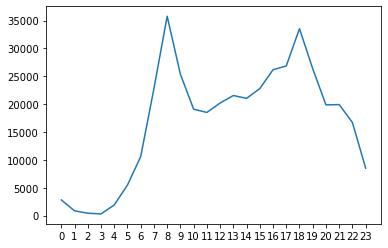

In [74]:
new4_2 = bus_dust10.copy()

new4_2.loc['시간 별 평균 이용자 수',:]= new4_2.loc['0':'3255','0':'23'].mean(axis=0)

temp_2 = new4_2.iloc[new4_2.shape[0]-1,3:27]

temp_2

plt.plot(temp_2)

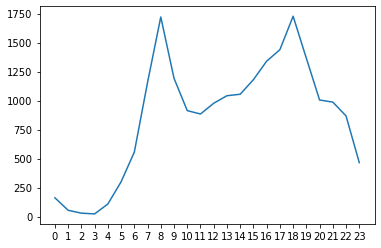

In [75]:
plt.plot(temp)